In [2]:
import plate_layout as pl
import pandas as pd
import numpy as np
import logging
from pathlib import Path

pl.logger.setLevel(logging.DEBUG)

In [3]:
study_sample_file = Path("./data/fake_cc_random_size.csv")
qc_scheme_file = Path("./config/plate_config.toml")

In [4]:
study_df = pd.read_csv(study_sample_file)
study_df

,Unnamed: 0,group_ID,specimen_ID,object,date_of_birth,year,barcode,organ
0,0,0,1,Case,2002-07-24,2002,9016361,Fallopian tubes
1,1,0,2,Case,2002-07-24,2002,69686641,Fallopian tubes
2,2,0,3,Case,2002-07-24,2002,36531073,Fallopian tubes
3,4,0,5,Case,2002-07-24,2002,78336636,Fallopian tubes
4,5,0,6,Control,2002-07-28,2002,6834210,Fallopian tubes
...,...,...,...,...,...,...,...,...
534,535,99,696,Case,2003-03-06,2003,29771974,Pharynx
535,536,99,697,Case,2003-03-06,2003,4159995,Pharynx
536,537,99,698,Case,2003-03-06,2003,1184556,Pharynx
537,538,99,699,Case,2003-03-06,2003,86189088,Pharynx


In [5]:
study_df.sort_values(by="group_ID")

,Unnamed: 0,group_ID,specimen_ID,object,date_of_birth,year,barcode,organ
0,0,0,1,Case,2002-07-24,2002,9016361,Fallopian tubes
1,1,0,2,Case,2002-07-24,2002,69686641,Fallopian tubes
2,2,0,3,Case,2002-07-24,2002,36531073,Fallopian tubes
3,4,0,5,Case,2002-07-24,2002,78336636,Fallopian tubes
4,5,0,6,Control,2002-07-28,2002,6834210,Fallopian tubes
...,...,...,...,...,...,...,...,...
533,534,99,695,Case,2003-03-06,2003,633499,Pharynx
534,535,99,696,Case,2003-03-06,2003,29771974,Pharynx
535,536,99,697,Case,2003-03-06,2003,4159995,Pharynx
536,537,99,698,Case,2003-03-06,2003,1184556,Pharynx


In [6]:
QCP = pl.QCPlate(qc_scheme_file.absolute(),(8,12))

[    INFO] --- Created a plate template with 96 wells:
[   DEBUG] --- Canonical well coordinates:
[['A_1' 'A_2' 'A_3' 'A_4' 'A_5' 'A_6' 'A_7' 'A_8' 'A_9' 'A_10' 'A_11' 'A_12']
 ['B_1' 'B_2' 'B_3' 'B_4' 'B_5' 'B_6' 'B_7' 'B_8' 'B_9' 'B_10' 'B_11' 'B_12']
 ['C_1' 'C_2' 'C_3' 'C_4' 'C_5' 'C_6' 'C_7' 'C_8' 'C_9' 'C_10' 'C_11' 'C_12']
 ['D_1' 'D_2' 'D_3' 'D_4' 'D_5' 'D_6' 'D_7' 'D_8' 'D_9' 'D_10' 'D_11' 'D_12']
 ['E_1' 'E_2' 'E_3' 'E_4' 'E_5' 'E_6' 'E_7' 'E_8' 'E_9' 'E_10' 'E_11' 'E_12']
 ['F_1' 'F_2' 'F_3' 'F_4' 'F_5' 'F_6' 'F_7' 'F_8' 'F_9' 'F_10' 'F_11' 'F_12']
 ['G_1' 'G_2' 'G_3' 'G_4' 'G_5' 'G_6' 'G_7' 'G_8' 'G_9' 'G_10' 'G_11' 'G_12']
 ['H_1' 'H_2' 'H_3' 'H_4' 'H_5' 'H_6' 'H_7' 'H_8' 'H_9' 'H_10' 'H_11' 'H_12']]
[    INFO] --- Successfully loaded config file /Users/b279669/Projects/CD-MRG-plate_layout/config/plate_config.toml
[   DEBUG] --- {'QC': {'start_with_QC_round': True, 'run_QC_after_n_specimens': 11, 'names': {'EC': 'EC: External_Control_(matrix)', 'PB': 'PB: Paper_Blank', 'PO

In [7]:
study_name = "my-study"
my_study = pl.Study(study_name)

In [8]:
my_study.load_specimen_records(study_sample_file, sample_group_id_column="group_ID")


[   DEBUG] --- Loading records file: data/fake_cc_random_size.csv
[   DEBUG] --- Importing csv file.
[   DEBUG] --- 539 specimens in file
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	group_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	year
[    INFO] --- 	barcode
[    INFO] --- 	organ
[   DEBUG] --- Sorting records in ascending order based on column 'group_ID'


In [9]:
my_study.randomize_order()
my_study.sort_records_within_groups("object")

[    INFO] --- Randomly permuting group order (samples within group unchanged) using variable 'group_ID'
[   DEBUG] --- Creating multiindex dataframe
[    INFO] --- Using a fixed seed to random number generator for reproducibility;                 running this method will always give the same result.
[   DEBUG] --- Using class-determined seed 1234 for random number generator
[    INFO] --- Sorting samples within group_ID by object


In [10]:
my_study.position_sample_within_groups("object", "Control", 1)
my_study.randomize_order()
my_study.specimen_records_df

[    INFO] --- Positioning sample within group_ID based on object value Control at index 1
[    INFO] --- Randomly permuting group order (samples within group unchanged) using variable 'group_ID'
[   DEBUG] --- Creating multiindex dataframe
[    INFO] --- Using a fixed seed to random number generator for reproducibility;                 running this method will always give the same result.
[   DEBUG] --- Using class-determined seed 1234 for random number generator


,index_before_permutation,group_ID,Unnamed: 0,specimen_ID,object,date_of_birth,year,barcode,organ
0,216,40,217,281,Case,1998-08-08,1998,25692747,Pharynx
1,217,40,220,284,Control,1998-08-08,1998,63998450,Pharynx
2,218,40,218,282,Case,1998-08-08,1998,27434741,Pharynx
3,219,40,219,283,Case,1998-08-08,1998,73620129,Pharynx
4,187,35,188,246,Case,1998-05-12,1998,68903268,Choroid plexus
...,...,...,...,...,...,...,...,...,...
534,253,47,258,335,Control,2005-03-19,2005,50631445,Choroid plexus
535,254,47,254,331,Case,2005-03-18,2005,22804648,Choroid plexus
536,255,47,255,332,Case,2005-03-18,2005,32862751,Choroid plexus
537,256,47,256,333,Case,2005-03-18,2005,41614327,Choroid plexus


In [15]:
qcplate = pl.QCPlate(qc_scheme_file, (8,12))
qcplate._specimen_capacity = 60

[    INFO] --- Created a plate template with 96 wells:
[   DEBUG] --- Canonical well coordinates:
[['A_1' 'A_2' 'A_3' 'A_4' 'A_5' 'A_6' 'A_7' 'A_8' 'A_9' 'A_10' 'A_11' 'A_12']
 ['B_1' 'B_2' 'B_3' 'B_4' 'B_5' 'B_6' 'B_7' 'B_8' 'B_9' 'B_10' 'B_11' 'B_12']
 ['C_1' 'C_2' 'C_3' 'C_4' 'C_5' 'C_6' 'C_7' 'C_8' 'C_9' 'C_10' 'C_11' 'C_12']
 ['D_1' 'D_2' 'D_3' 'D_4' 'D_5' 'D_6' 'D_7' 'D_8' 'D_9' 'D_10' 'D_11' 'D_12']
 ['E_1' 'E_2' 'E_3' 'E_4' 'E_5' 'E_6' 'E_7' 'E_8' 'E_9' 'E_10' 'E_11' 'E_12']
 ['F_1' 'F_2' 'F_3' 'F_4' 'F_5' 'F_6' 'F_7' 'F_8' 'F_9' 'F_10' 'F_11' 'F_12']
 ['G_1' 'G_2' 'G_3' 'G_4' 'G_5' 'G_6' 'G_7' 'G_8' 'G_9' 'G_10' 'G_11' 'G_12']
 ['H_1' 'H_2' 'H_3' 'H_4' 'H_5' 'H_6' 'H_7' 'H_8' 'H_9' 'H_10' 'H_11' 'H_12']]
[    INFO] --- Successfully loaded config file config/plate_config.toml
[   DEBUG] --- {'QC': {'start_with_QC_round': True, 'run_QC_after_n_specimens': 11, 'names': {'EC': 'EC: External_Control_(matrix)', 'PB': 'PB: Paper_Blank', 'PO': 'PO: Pooled_specimens'}, 'scheme': {'EC':

In [16]:

my_study.distribute_samples_to_plates(qcplate)

[   DEBUG] --- Adding 56 samples to plate 1
[   DEBUG] --- 	 -> Done. Last specimen placed in F_8
[   DEBUG] --- Adding 59 samples to plate 2
[   DEBUG] --- 	 -> Done. Last specimen placed in F_11
[   DEBUG] --- Adding 59 samples to plate 3
[   DEBUG] --- 	 -> Done. Last specimen placed in F_11
[   DEBUG] --- Adding 57 samples to plate 4
[   DEBUG] --- 	 -> Done. Last specimen placed in F_9
[   DEBUG] --- Adding 58 samples to plate 5
[   DEBUG] --- 	 -> Done. Last specimen placed in F_10
[   DEBUG] --- Adding 56 samples to plate 6
[   DEBUG] --- 	 -> Done. Last specimen placed in F_8
[   DEBUG] --- Adding 58 samples to plate 7
[   DEBUG] --- 	 -> Done. Last specimen placed in F_10
[   DEBUG] --- Adding 55 samples to plate 8
[   DEBUG] --- 	 -> Done. Last specimen placed in F_5
[   DEBUG] --- Adding 58 samples to plate 9
[   DEBUG] --- 	 -> Done. Last specimen placed in F_10
[   DEBUG] --- Adding 23 samples to plate 10
[   DEBUG] --- 	 -> Done. Last specimen placed in C_5
[    INFO] ---

In [17]:
variables = ["group_ID", "specimen_ID", "object", "date_of_birth", "year", "barcode","organ"]
my_study.to_layout_lists(variables, folder_path="output")


[    INFO] --- Writing to file:
	output/my-study_Plate_1.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_2.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_3.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_4.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_5.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_6.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_7.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_8.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_9.txt
[    INFO] --- Writing to file:
	output/my-study_Plate_10.txt


[   DEBUG] --- Metadata 'group_ID' has 12 values: ['15' '23' '24' '26' '30' '43' '49' '58' '76' '89' '90' 'NaN'].
[   DEBUG] --- Assigning 12 colors from colormap tab20 to metadata 'group_ID' as:
[   DEBUG] --- 15 : (0.12, 0.47, 0.71)
[   DEBUG] --- 23 : (0.68, 0.78, 0.91)
[   DEBUG] --- 24 : (1.00, 0.50, 0.05)
[   DEBUG] --- 26 : (1.00, 0.73, 0.47)
[   DEBUG] --- 30 : (0.17, 0.63, 0.17)
[   DEBUG] --- 43 : (0.60, 0.87, 0.54)
[   DEBUG] --- 49 : (0.84, 0.15, 0.16)
[   DEBUG] --- 58 : (1.00, 0.60, 0.59)
[   DEBUG] --- 76 : (0.58, 0.40, 0.74)
[   DEBUG] --- 89 : (0.77, 0.69, 0.84)
[   DEBUG] --- 90 : (0.55, 0.34, 0.29)
[   DEBUG] --- NaN: (1.00, 1.00, 1.00)


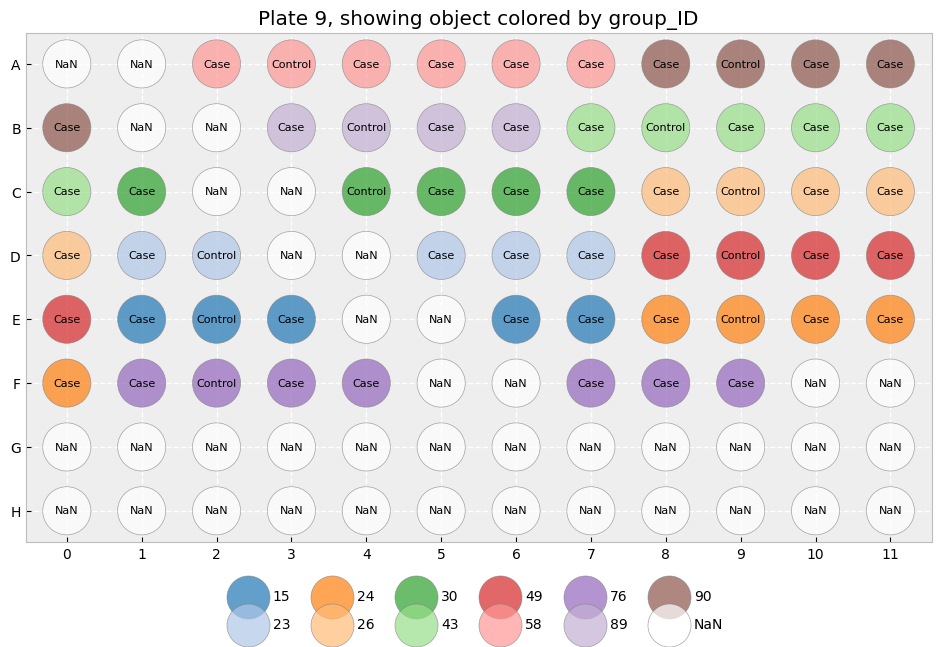

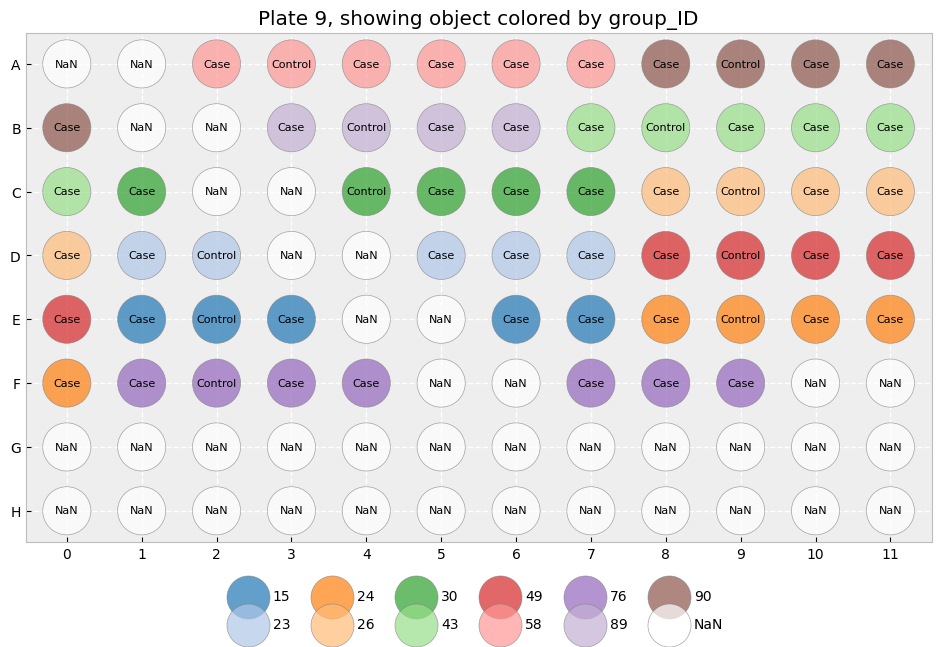

In [20]:
plate_1 = my_study[-2]
plate_1.to_figure(annotation_metadata_key="object", 
             color_metadata_key="group_ID",)